In [2]:
# %load_ext autoreload

# %autoreload 2

from countrycrab import solver
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7"

### Example 1: pass to the solver just the instance path

It is important to note that iteration counts are by convention zero-index in CountryCrab, but one-index in the Julia simulator I had previously used to study theses heuristics. Annealing schedules must be adapted to this difference.

Let $f(t) = y_0 \exp(r t)$, $g(t) = \hat{y}_0 \exp(r (t + \Delta))$. Observe that
$$g(t) = \hat{y}_0 \exp(r \Delta) \exp(r t)$$
So, to get equivalent annealing statistics, $\beta_0^{(CC)} = \beta_0^{(J)} \exp(r^{(J)})$.

In [3]:
module_path = os.path.abspath(os.path.join("."))
config = {
    'instance': module_path+'/data/datasets/uf20-91/uf20-01.cnf',
    'heuristic': 'pubo_serial_rfplusoffset',
    'compiler':'compile_pubo_dpgrad_pmbenergy',
    'beta0': 0.5*np.exp(1e-2),
    'r_beta': 1e-2,
    # 'p0': 1.0,
    # 'rp': 10**-5.5,
    'Delta_Eo': 0.5
}
params = {
    'max_runs':1_000,
    'max_flips':5_000,
}

In [4]:
# from countrycrab.compiler import compile_pubo
# import cupy as cp

# arch, _ = compile_pubo(config, params)

# def beta(t):
#     # annealing_schedule_type = config.get("annealing_schedule_type", "exp")
#     beta0 = config.get("beta0", 0.1)
#     r_beta = config.get("r_beta", 1e-6)
#     return beta0 * np.exp(r_beta*t)

# pxb = arch[0]
# axb = arch[1]
# axb_scales = cp.tile(arch[2], (params['max_runs'],1)).T
# w1 = cp.tile(arch[3], (params['max_runs'],1)).T
# w0 = arch[4]
# ups = arch[5]
# dns = arch[6]

In [5]:
# max_runs, num_vars = params['max_runs'], 20
# state = cp.random.randint(2, size=(max_runs, num_vars)).astype(cp.float32)
# frozen = cp.zeros(max_runs, dtype="bool")
# Eo = cp.zeros(state.shape, dtype=cp.float32)

# n_iters = 5
# gr = (pxb @ ((axb @ state.T) >= axb_scales) + w1).T
# alpha = np.sqrt(2/np.pi) / beta(n_iters)
# next_cands = (gr + Eo*(2*state-1)) < (cp.random.randn(*gr.shape) * alpha)
# flip_cands = next_cands != state
# samps_flip_cands = cp.random.rand(*flip_cands.shape) * flip_cands
# idxs_rf_flips = cp.vstack([cp.arange(samps_flip_cands.shape[0]), cp.argmax(samps_flip_cands, axis=1)]).T[~frozen,:]
# # state[not_frozen,:][idxs_backup_flips] = next_cands[not_frozen,:][idxs_backup_flips]
# state[(idxs_rf_flips[:,0],idxs_rf_flips[:,1])] = next_cands[(idxs_rf_flips[:,0],idxs_rf_flips[:,1])]

In [6]:
# cp.vstack([
#     cp.arange(samps_flip_cands.shape[0]),
#     cp.argmax(samps_flip_cands, axis=1)
# ]).T

In [7]:
%%time
p_vs_t_g, violated_constr_mat, inputs = solver.solve(config = config,params = config)

CPU times: user 819 ms, sys: 93.6 ms, total: 913 ms
Wall time: 917 ms


In [8]:
np.mean(np.any(violated_constr_mat==0))

1.0

In [10]:
p_vs_t_g

array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.05, 0.06, 0.06, 0.07, 0.07, 0.07, 0.08,
       0.08, 0.09, 0.09, 0.1 , 0.1 , 0.11, 0.15, 0.15, 0.16, 0.17, 0.17,
       0.18, 0.2 , 0.21, 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.25, 0.26,
       0.26, 0.26, 0.26, 0.27, 0.29, 0.29, 0.29, 0.31, 0.31, 0.31, 0.32,
       0.33, 0.36, 0.36, 0.36, 0.37, 0.38, 0.38, 0.38, 0.39, 0.39, 0.4 ,
       0.42, 0.42, 0.44, 0.45, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.49, 0.5 , 0.51, 0.52, 0.54, 0.56, 0.56, 0.57, 0.59, 0.6 , 0.6 ,
       0.62, 0.62, 0.65, 0.65, 0.65, 0.65, 0.66, 0.66, 0.66, 0.67, 0.67,
       0.68, 0.69, 0.69, 0.7 , 0.71, 0.71, 0.72, 0.72, 0.72, 0.72, 0.73,
       0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.74, 0.74, 0.74,
       0.74, 0.75, 0.76, 0.76, 0.77, 0.77, 0.77, 0.77, 0.77, 0.78, 0.78,
       0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.

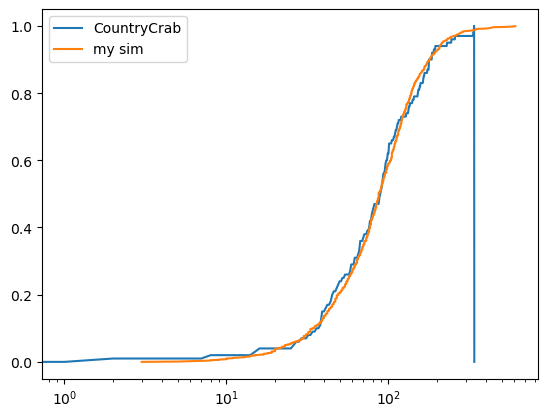

In [12]:
# plt.semilogx(np.sort(np.nanargmin(violated_constr_mat, axis=1)), np.arange(0,1,1/1000), label="CountryCrab")
plt.semilogx(p_vs_t_g, label="CountryCrab")
plt.semilogx(np.sort(np.load("/home/hutch/devel/memhnn_experiments/uf20-01_ttss.npz"))-1, np.arange(0,1,1/1000), label="my sim")
plt.legend()

Text(0, 0.5, 'Number of violated clauses')

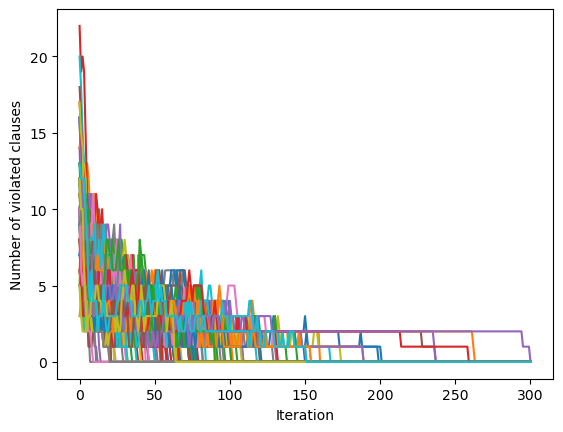

In [21]:
for run in violated_constr_mat:
    plt.plot(run)
# plt.plot(violated_constr_mat[0,:])
plt.xlabel('Iteration')
plt.ylabel('Number of violated clauses')